In [2]:
# Set global directories
DATA_DIR = "./data"
DATASET_DIR = f"{DATA_DIR}/datasets"

CACHE_DIR = f"{DATA_DIR}/cache"
DATASET_CACHE_DIR = f"{CACHE_DIR}/datasets"

TRAIN_DATA_DIR = f"{DATASET_DIR}/raw"
CLEANED_TRAIN_DATA_DIR = f"{DATASET_DIR}/cleaned"
PROCESSED_TRAIN_DATA_DIR = f"{DATASET_DIR}/processed"

# Set path to cache visualizations and models
VISUALIZATION_DIR = f"{CACHE_DIR}/visualizations"
MODEL_DIR = f"{CACHE_DIR}/models"

In [3]:
from utils.cache import reload_custom_libaries

reload_custom_libaries()

Modules ['utils.image_process'] do not exist in the current environment.
Refreshing cache for all modules...


# Import necessary packages and libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from PIL import ImageFile
import os, sys
from tqdm.auto import tqdm


# Load personalize utils
from utils.image_process import image_path, img_dupChecks, imgSizeList

c:\Users\thaih\.conda\envs\Assignment2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Get a general view of the dataset

In [5]:
data = tf.keras.utils.image_dataset_from_directory(TRAIN_DATA_DIR)

Found 90082 files belonging to 6 classes.


# Extract image paths into different categories base on its type

In [6]:
# extracting paths from each of the category
beds_path = image_path(TRAIN_DATA_DIR, "beds")
chairs_path = image_path(TRAIN_DATA_DIR, "chairs")
dressers_path = image_path(TRAIN_DATA_DIR, "dressers")
lamps_path = image_path(TRAIN_DATA_DIR, "lamps")
sofas_path = image_path(TRAIN_DATA_DIR, "sofas")
tables_path = image_path(TRAIN_DATA_DIR, "tables")

print("Successfully extract all paths!")

Getting path: 100%|██████████| 17/17 [00:00<00:00, 114.35it/s]


Successfully extract all paths!


# EDA

## Get the total amount of images in different categories before checking for duplicants

In [7]:
print("Amount of bed: ", len(beds_path))
print("Amount of chair: ", len(chairs_path))
print("Amount of dresser: ", len(dressers_path))
print("Amount of lamp: ", len(lamps_path))
print("Amount of sofa: ", len(sofas_path))
print("Amount of table: ", len(tables_path))
print(
    "Total: ",
    len(beds_path)
    + len(chairs_path)
    + len(dressers_path)
    + len(lamps_path)
    + len(sofas_path)
    + len(tables_path),
)

Amount of bed:  6578
Amount of chair:  22053
Amount of dresser:  7871
Amount of lamp:  32401
Amount of sofa:  4080
Amount of table:  17100
Total:  90083


### Visualization

In [8]:
image_Classes = {
    "Beds": len(beds_path),
    "Chairs": len(chairs_path),
    "Dressers": len(dressers_path),
    "Sofas": len(sofas_path),
    "Lamps": len(lamps_path),
    "Tables": len(tables_path),
}

Text(0, 0.5, 'Amount')

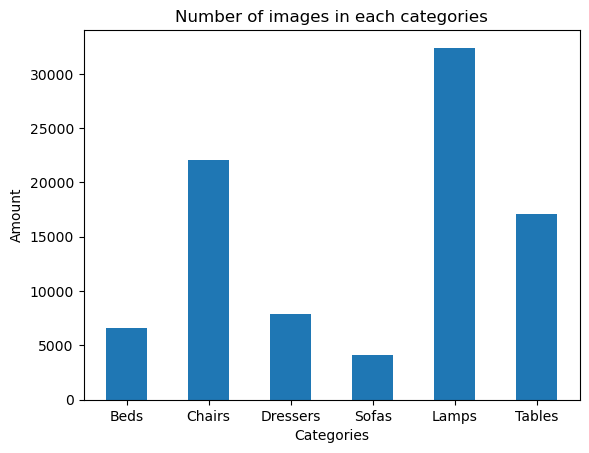

In [9]:
plt.bar(image_Classes.keys(), image_Classes.values(), width=0.5)
plt.title("Number of images in each categories")
plt.xlabel("Categories")
plt.ylabel("Amount")

## Get duplicate images from each categories

### Check duplicants and remove duplicants from each categories

In [10]:
# Get the amount of duplicants and then remove it from the dataset
print("Bed")
img_dupChecks(beds_path)
print("Chair")
img_dupChecks(chairs_path)
print("Dresser")
img_dupChecks(dressers_path)
print("Sofa")
img_dupChecks(sofas_path)

Bed


Finding duplicate images: 100%|██████████| 6578/6578 [00:08<00:00, 753.84it/s]


Number of duplicants:  397
Duplicants has been removed!
Chair


Finding duplicate images: 100%|██████████| 22053/22053 [00:31<00:00, 710.61it/s]


Number of duplicants:  1789
Duplicants has been removed!
Dresser


Finding duplicate images: 100%|██████████| 7871/7871 [00:11<00:00, 676.91it/s]


Number of duplicants:  595
Duplicants has been removed!
Sofa


Finding duplicate images: 100%|██████████| 4080/4080 [00:05<00:00, 680.10it/s]

Number of duplicants:  357
Duplicants has been removed!


In [11]:
print("Lamp")
img_dupChecks(lamps_path)
print("Table")
img_dupChecks(tables_path)

Lamp


Finding duplicate images: 100%|██████████| 32401/32401 [00:54<00:00, 598.25it/s]


Number of duplicants:  5528
Duplicants has been removed!
Table


Finding duplicate images: 100%|██████████| 17100/17100 [00:23<00:00, 733.03it/s]

Number of duplicants:  1007
Duplicants has been removed!


### Recheck the categories after removing duplicants

In [12]:
print("Amount of bed: ", len(beds_path))
print("Amount of chair: ", len(chairs_path))
print("Amount of dresser: ", len(dressers_path))
print("Amount of lamp: ", len(lamps_path))
print("Amount of sofa: ", len(sofas_path))
print("Amount of table: ", len(tables_path))
print(
    "Total: ",
    len(beds_path)
    + len(chairs_path)
    + len(dressers_path)
    + len(lamps_path)
    + len(sofas_path)
    + len(tables_path),
)

Amount of bed:  6578
Amount of chair:  22053
Amount of dresser:  7871
Amount of lamp:  32401
Amount of sofa:  4080
Amount of table:  17100
Total:  90083


### Visualization

In [13]:
image_Classes_modified = {
    "Beds": len(beds_path),
    "Chairs": len(chairs_path),
    "Dressers": len(dressers_path),
    "Sofas": len(sofas_path),
    "Lamps": len(lamps_path),
    "Tables": len(tables_path),
}

Text(0, 0.5, 'Amount')

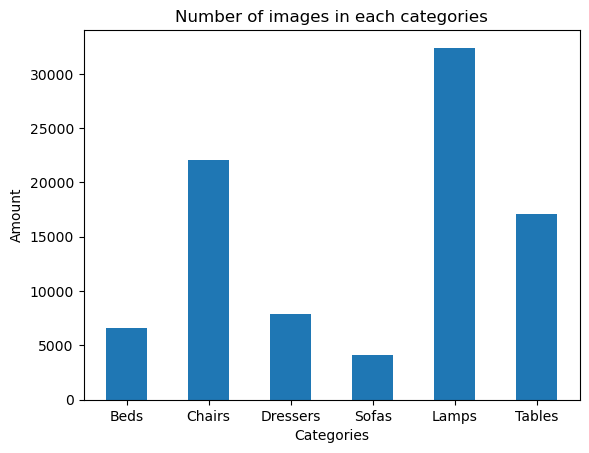

In [14]:
plt.bar(image_Classes_modified.keys(), image_Classes_modified.values(), width=0.5)
plt.title("Number of images in each categories")
plt.xlabel("Categories")
plt.ylabel("Amount")

-   In the plot we can see the differences between of the amount in different columns. Because of that, we will need to check for the imbalances of our dataset

## Get different amount of image size of each category

In [15]:
print("Beds")
imgSizeList(beds_path)
print("Chairs")
imgSizeList(chairs_path)
print("Dressers")
imgSizeList(dressers_path)
print("Lamps")
imgSizeList(lamps_path)
print("sofas")
imgSizeList(sofas_path)
print("Tables")
imgSizeList(tables_path)

Beds


Getting image size: 100%|██████████| 6578/6578 [00:02<00:00, 2232.81it/s]


224x224 pixels:  6578
350x350 pixels:  0
Other size:  0
Chairs


Getting image size: 100%|██████████| 22053/22053 [00:11<00:00, 1882.63it/s]


224x224 pixels:  19234
350x350 pixels:  2819
Other size:  0
Dressers


Getting image size: 100%|██████████| 7871/7871 [00:03<00:00, 2114.77it/s]


224x224 pixels:  5912
350x350 pixels:  1959
Other size:  0
Lamps


Getting image size: 100%|██████████| 32401/32401 [00:15<00:00, 2145.82it/s]


224x224 pixels:  19908
350x350 pixels:  12493
Other size:  0
sofas


Getting image size: 100%|██████████| 4080/4080 [00:01<00:00, 2188.68it/s]


224x224 pixels:  3149
350x350 pixels:  931
Other size:  0
Tables


Getting image size: 100%|██████████| 17100/17100 [00:07<00:00, 2188.08it/s]

224x224 pixels:  15442
350x350 pixels:  1658
Other size:  0


[(224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (350, 350),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),

### Visualization

In [16]:
df_bed_dims = pd.DataFrame(imgSizeList(beds_path), columns=['width', 'height'])
df_chair_dims = pd.DataFrame(imgSizeList(chairs_path), columns=['width', 'height'])
df_dresser_dims = pd.DataFrame(imgSizeList(dressers_path), columns=['width', 'height'])
df_lamp_dims = pd.DataFrame(imgSizeList(lamps_path), columns=['width', 'height'])
df_sofa_dims = pd.DataFrame(imgSizeList(sofas_path), columns=['width', 'height'])
df_table_dims = pd.DataFrame(imgSizeList(tables_path), columns=['width', 'height'])


Getting image size: 100%|██████████| 6578/6578 [00:02<00:00, 2311.70it/s]


224x224 pixels:  6578
350x350 pixels:  0
Other size:  0


Getting image size: 100%|██████████| 22053/22053 [00:10<00:00, 2103.33it/s]


224x224 pixels:  19234
350x350 pixels:  2819
Other size:  0


Getting image size: 100%|██████████| 7871/7871 [00:03<00:00, 2110.20it/s]


224x224 pixels:  5912
350x350 pixels:  1959
Other size:  0


Getting image size: 100%|██████████| 32401/32401 [00:17<00:00, 1895.37it/s]


224x224 pixels:  19908
350x350 pixels:  12493
Other size:  0


Getting image size: 100%|██████████| 4080/4080 [00:02<00:00, 1745.97it/s]


224x224 pixels:  3149
350x350 pixels:  931
Other size:  0


Getting image size: 100%|██████████| 17100/17100 [00:09<00:00, 1777.78it/s]

224x224 pixels:  15442
350x350 pixels:  1658
Other size:  0


#### Recheck data in each dataset

In [17]:
df_bed_dims

,width,height
0,224,224
1,224,224
2,224,224
3,224,224
4,224,224
...,...,...
6573,224,224
6574,224,224
6575,224,224
6576,224,224


In [18]:
df_chair_dims

,width,height
0,224,224
1,224,224
2,224,224
3,224,224
4,224,224
...,...,...
22048,224,224
22049,350,350
22050,224,224
22051,224,224


In [19]:
df_dresser_dims

,width,height
0,224,224
1,224,224
2,224,224
3,224,224
4,224,224
...,...,...
7866,224,224
7867,224,224
7868,224,224
7869,224,224


In [20]:
df_lamp_dims

,width,height
0,224,224
1,224,224
2,224,224
3,224,224
4,224,224
...,...,...
32396,350,350
32397,224,224
32398,350,350
32399,350,350


In [21]:
df_sofa_dims

,width,height
0,224,224
1,224,224
2,224,224
3,224,224
4,224,224
...,...,...
4075,224,224
4076,224,224
4077,224,224
4078,224,224


In [22]:
df_table_dims

,width,height
0,224,224
1,224,224
2,224,224
3,224,224
4,224,224
...,...,...
17095,350,350
17096,224,224
17097,224,224
17098,224,224


#### Visualization of each dataset

<Axes: xlabel='width', ylabel='height'>

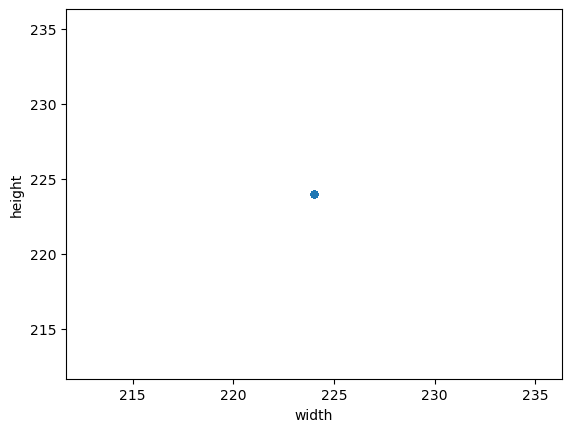

In [23]:
df_bed_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

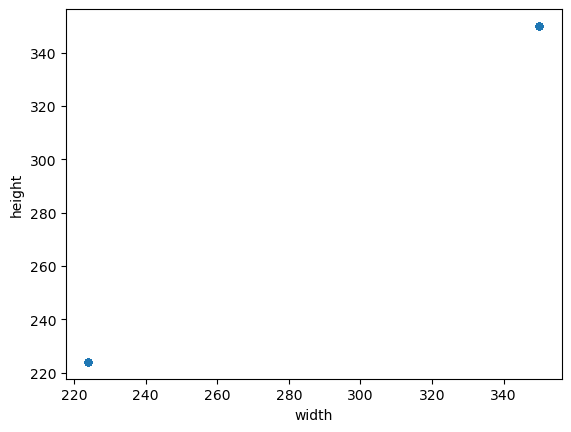

In [24]:
df_chair_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

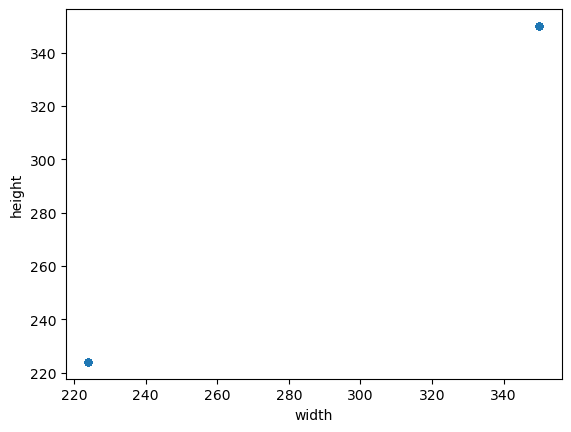

In [25]:
df_dresser_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

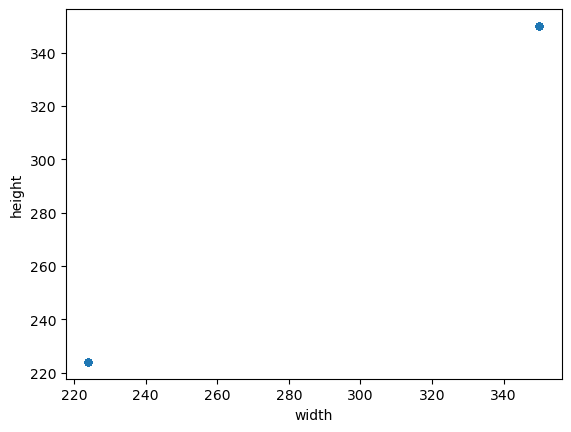

In [26]:
df_lamp_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

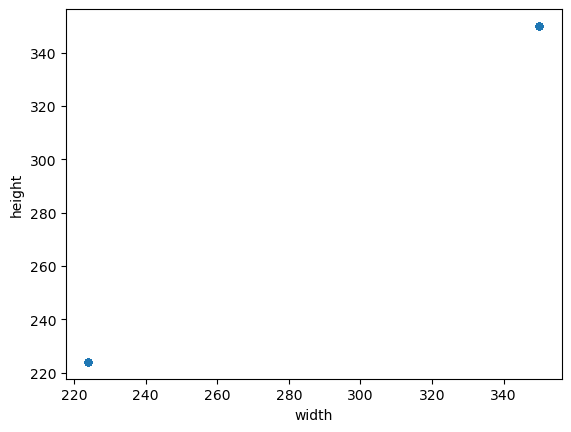

In [27]:
df_sofa_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

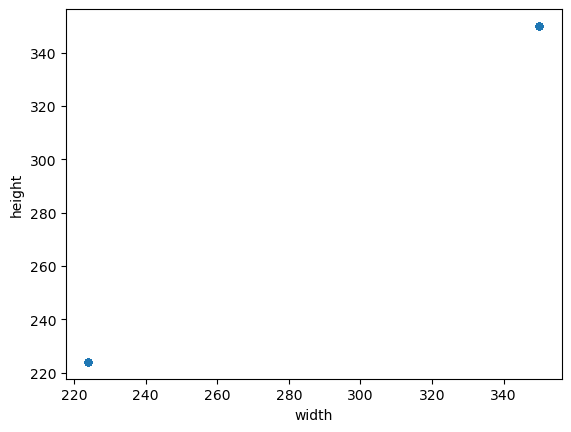

In [28]:
df_table_dims.plot.scatter(x="width", y="height")

Investigate anomaly data in the dataframe

In [29]:
df_bed_dims.describe().T

,count,mean,std,min,25%,50%,75%,max
width,6578.0,224.0,0.0,224.0,224.0,224.0,224.0,224.0
height,6578.0,224.0,0.0,224.0,224.0,224.0,224.0,224.0


In [30]:
df_chair_dims.describe().T

,count,mean,std,min,25%,50%,75%,max
width,22053.0,240.10638,42.072184,224.0,224.0,224.0,224.0,350.0
height,22053.0,240.10638,42.072184,224.0,224.0,224.0,224.0,350.0


In [31]:
df_dresser_dims.describe().T

,count,mean,std,min,25%,50%,75%,max
width,7871.0,255.359929,54.481951,224.0,224.0,224.0,224.0,350.0
height,7871.0,255.359929,54.481951,224.0,224.0,224.0,224.0,350.0


In [32]:
df_lamp_dims.describe().T

,count,mean,std,min,25%,50%,75%,max
width,32401.0,272.582389,61.329019,224.0,224.0,224.0,350.0,350.0
height,32401.0,272.582389,61.329019,224.0,224.0,224.0,350.0,350.0


In [33]:
df_sofa_dims.describe().T

,count,mean,std,min,25%,50%,75%,max
width,4080.0,252.751471,52.884059,224.0,224.0,224.0,224.0,350.0
height,4080.0,252.751471,52.884059,224.0,224.0,224.0,224.0,350.0


In [34]:
df_table_dims.describe().T

,count,mean,std,min,25%,50%,75%,max
width,17100.0,236.216842,37.284744,224.0,224.0,224.0,224.0,350.0
height,17100.0,236.216842,37.284744,224.0,224.0,224.0,224.0,350.0


## Conclusion

-   The dataset contains 6 categories of items with 90083 items total
-   The dataset contains all file with JPEG type
-   The dataset contains image mainly in two dimensions: 224x224 and 350x350. However there are one anomaly dimensions in the table category which is: 500x446

## Data Preprocessing

### Data Cleaning

First we will start with resizing all images to 350x350. Here are some reasons:
- The vast majority of the images are already at 350x350. Upscaling the smaller images will introduce minimal distortion compared to downscaling the majority to 224x224.
- Upscaling generally retains more information from the original image than downscaling. While some interpolation artifacts might be introduced, they are less likely to significantly impact model performance compared to the information loss from downscaling.
- The single image with a size of 500x448 is an outlier. which we can either upscale it to match the majority or exclude it from our dataset without significant impact.

In [35]:
image_process.imgResize(beds_path, 350)
image_process.imgResize(chairs_path, 350)
image_process.imgResize(dressers_path, 350)
image_process.imgResize(lamps_path, 350)
image_process.imgResize(sofas_path, 350)
image_process.imgResize(tables_path, 350)


NameError: name 'image_process' is not defined

### Data Augmentation